In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings

In [3]:
df=pd.read_csv('baseball.csv')
df.head(8)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77


In the above data, we have following attributes. In this we have to predict Wins (W) based on 16 different attributes:

Here our target/output is W i.e win and rest are inputs.
R:Runs
AB:At Bats
H:Hits
2B:Doubles
3B:Triples
HR:Homeruns
BB:Walks
SO:Strikeouts
SB:Stolen Bases
RA:Runs Allowed
ER:Earned Runs
ERA:Earned Run Average (ERA)
CG:Shutouts
SV:Saves,
SV:Complete Games
E:Errors
W:Win

In [4]:
df.shape

(30, 17)

Data has 30 rows and 17 columns. 

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In the above inputs and target all have integer and float values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

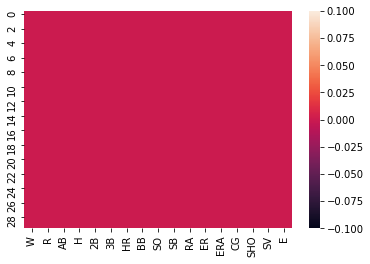

In [7]:
sns.heatmap(df.isnull())

We have seen null values using heatmap. So, no null values are present in the data. We can proceed easily.

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


As we can see from above data, that count is equal in all columns, hence no missing data is present.
In AB,H,HR and E Mean is greater than median, means data is right skewed in these columns. 
In column HR,BB,SO,SB,RA,ER there is large gap between 75th and max,there are chances that some outliers may present.
High standard deviation in column R,AB,H,BB,SO,RA,ER, means data is spreaded.

We will use boxplot type of visualization to see the outliers, and we can see that some outliers are present. Later we will use zcore to remove them.

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

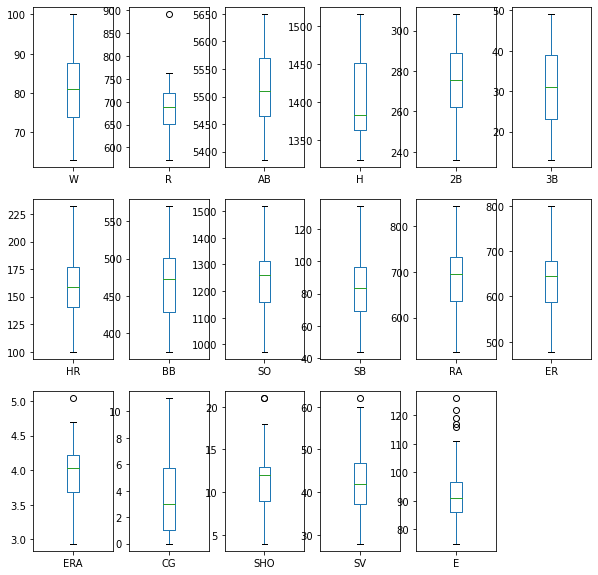

In [10]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

Now we will check the skewness in the data

In [11]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [12]:
import matplotlib.pyplot as plt

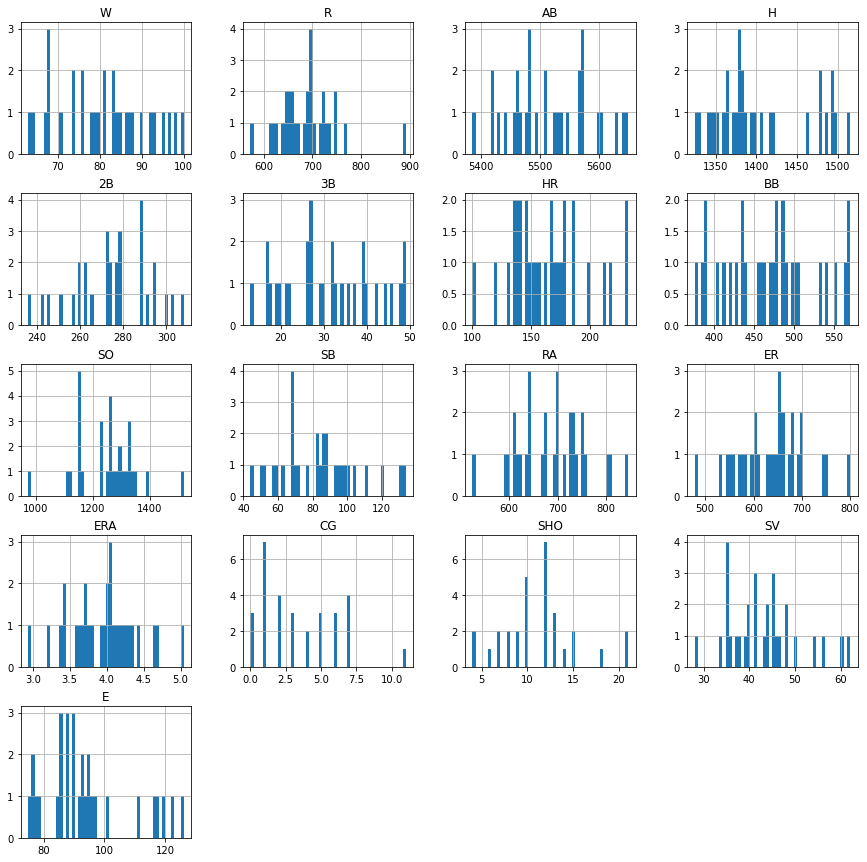

In [13]:
df.hist(bins=50, figsize=(15,15))
plt.show()

<AxesSubplot:ylabel='Frequency'>

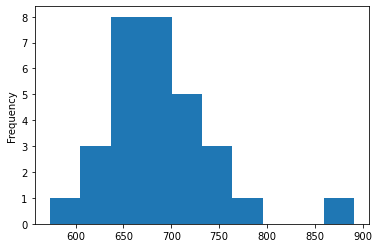

In [14]:
df['R'].plot.hist()

In R column some swekness is present 

<AxesSubplot:xlabel='R', ylabel='Density'>

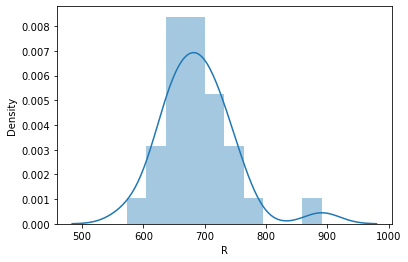

In [15]:
sns.distplot(df['R'],bins=10)

<AxesSubplot:ylabel='Frequency'>

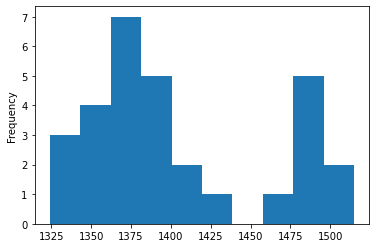

In [16]:
df['H'].plot.hist()

In H column data is sked right side

<AxesSubplot:xlabel='H', ylabel='Density'>

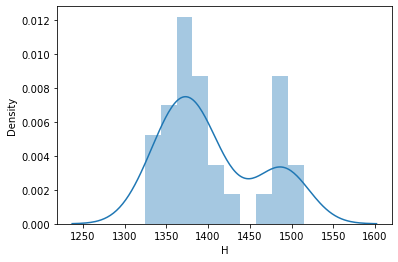

In [17]:
sns.distplot(df['H'],bins=10)

<AxesSubplot:ylabel='Frequency'>

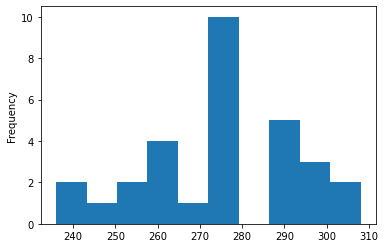

In [18]:
df['2B'].plot.hist()

In 2B column data is skewed left side

<AxesSubplot:xlabel='2B', ylabel='Density'>

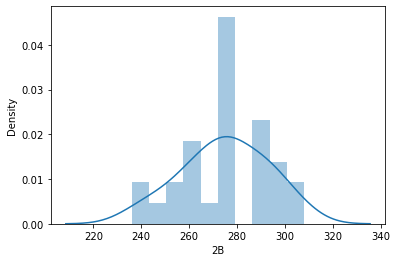

In [19]:
sns.distplot(df['2B'],bins=10)

<AxesSubplot:ylabel='Frequency'>

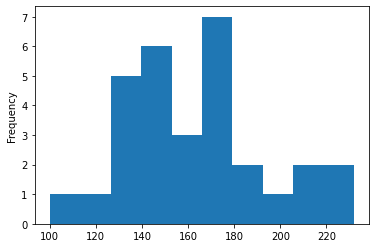

In [20]:
df['HR'].plot.hist()

In HR column data is skewed right side

<AxesSubplot:xlabel='HR', ylabel='Density'>

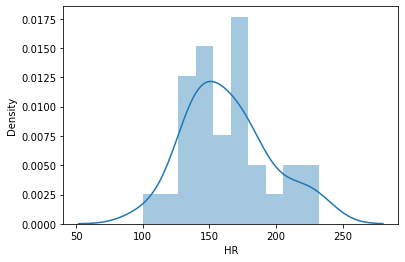

In [21]:
sns.distplot(df['HR'],bins=10)

<AxesSubplot:ylabel='Frequency'>

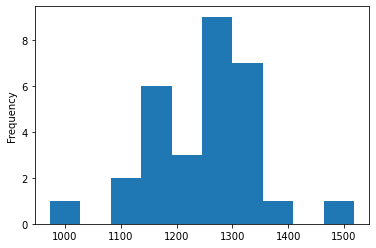

In [22]:
df['SO'].plot.hist()

In SO column data is skewed left side

<AxesSubplot:xlabel='SO', ylabel='Density'>

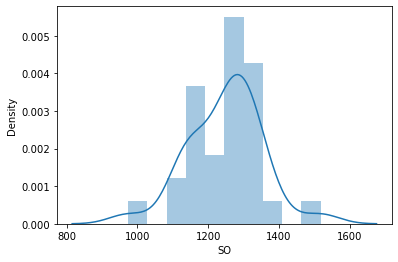

In [23]:
sns.distplot(df['SO'],bins=10)

<AxesSubplot:ylabel='Frequency'>

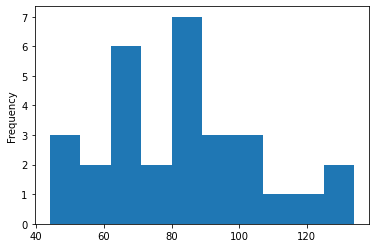

In [24]:
df['SB'].plot.hist()

In RA column data is skewed both sides

<AxesSubplot:ylabel='Frequency'>

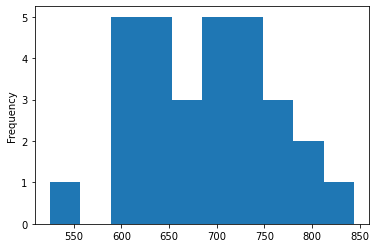

In [25]:
df['RA'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

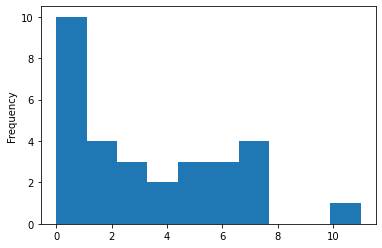

In [26]:
df['CG'].plot.hist()

In CG column data is skewed right side

<AxesSubplot:xlabel='CG', ylabel='Density'>

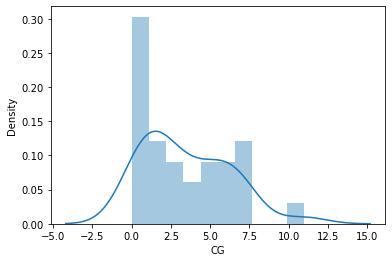

In [27]:
sns.distplot(df['CG'],bins=10)

<AxesSubplot:ylabel='Frequency'>

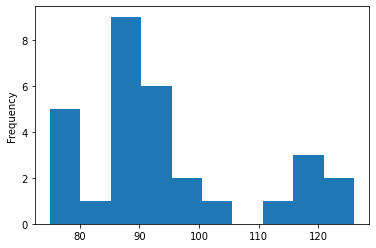

In [28]:
df['E'].plot.hist()

In E column data is skewed right side

Now we will use pairplot to see all plots in one go. We can see below that data is not normalised, we will remove the skewness by using power transform.

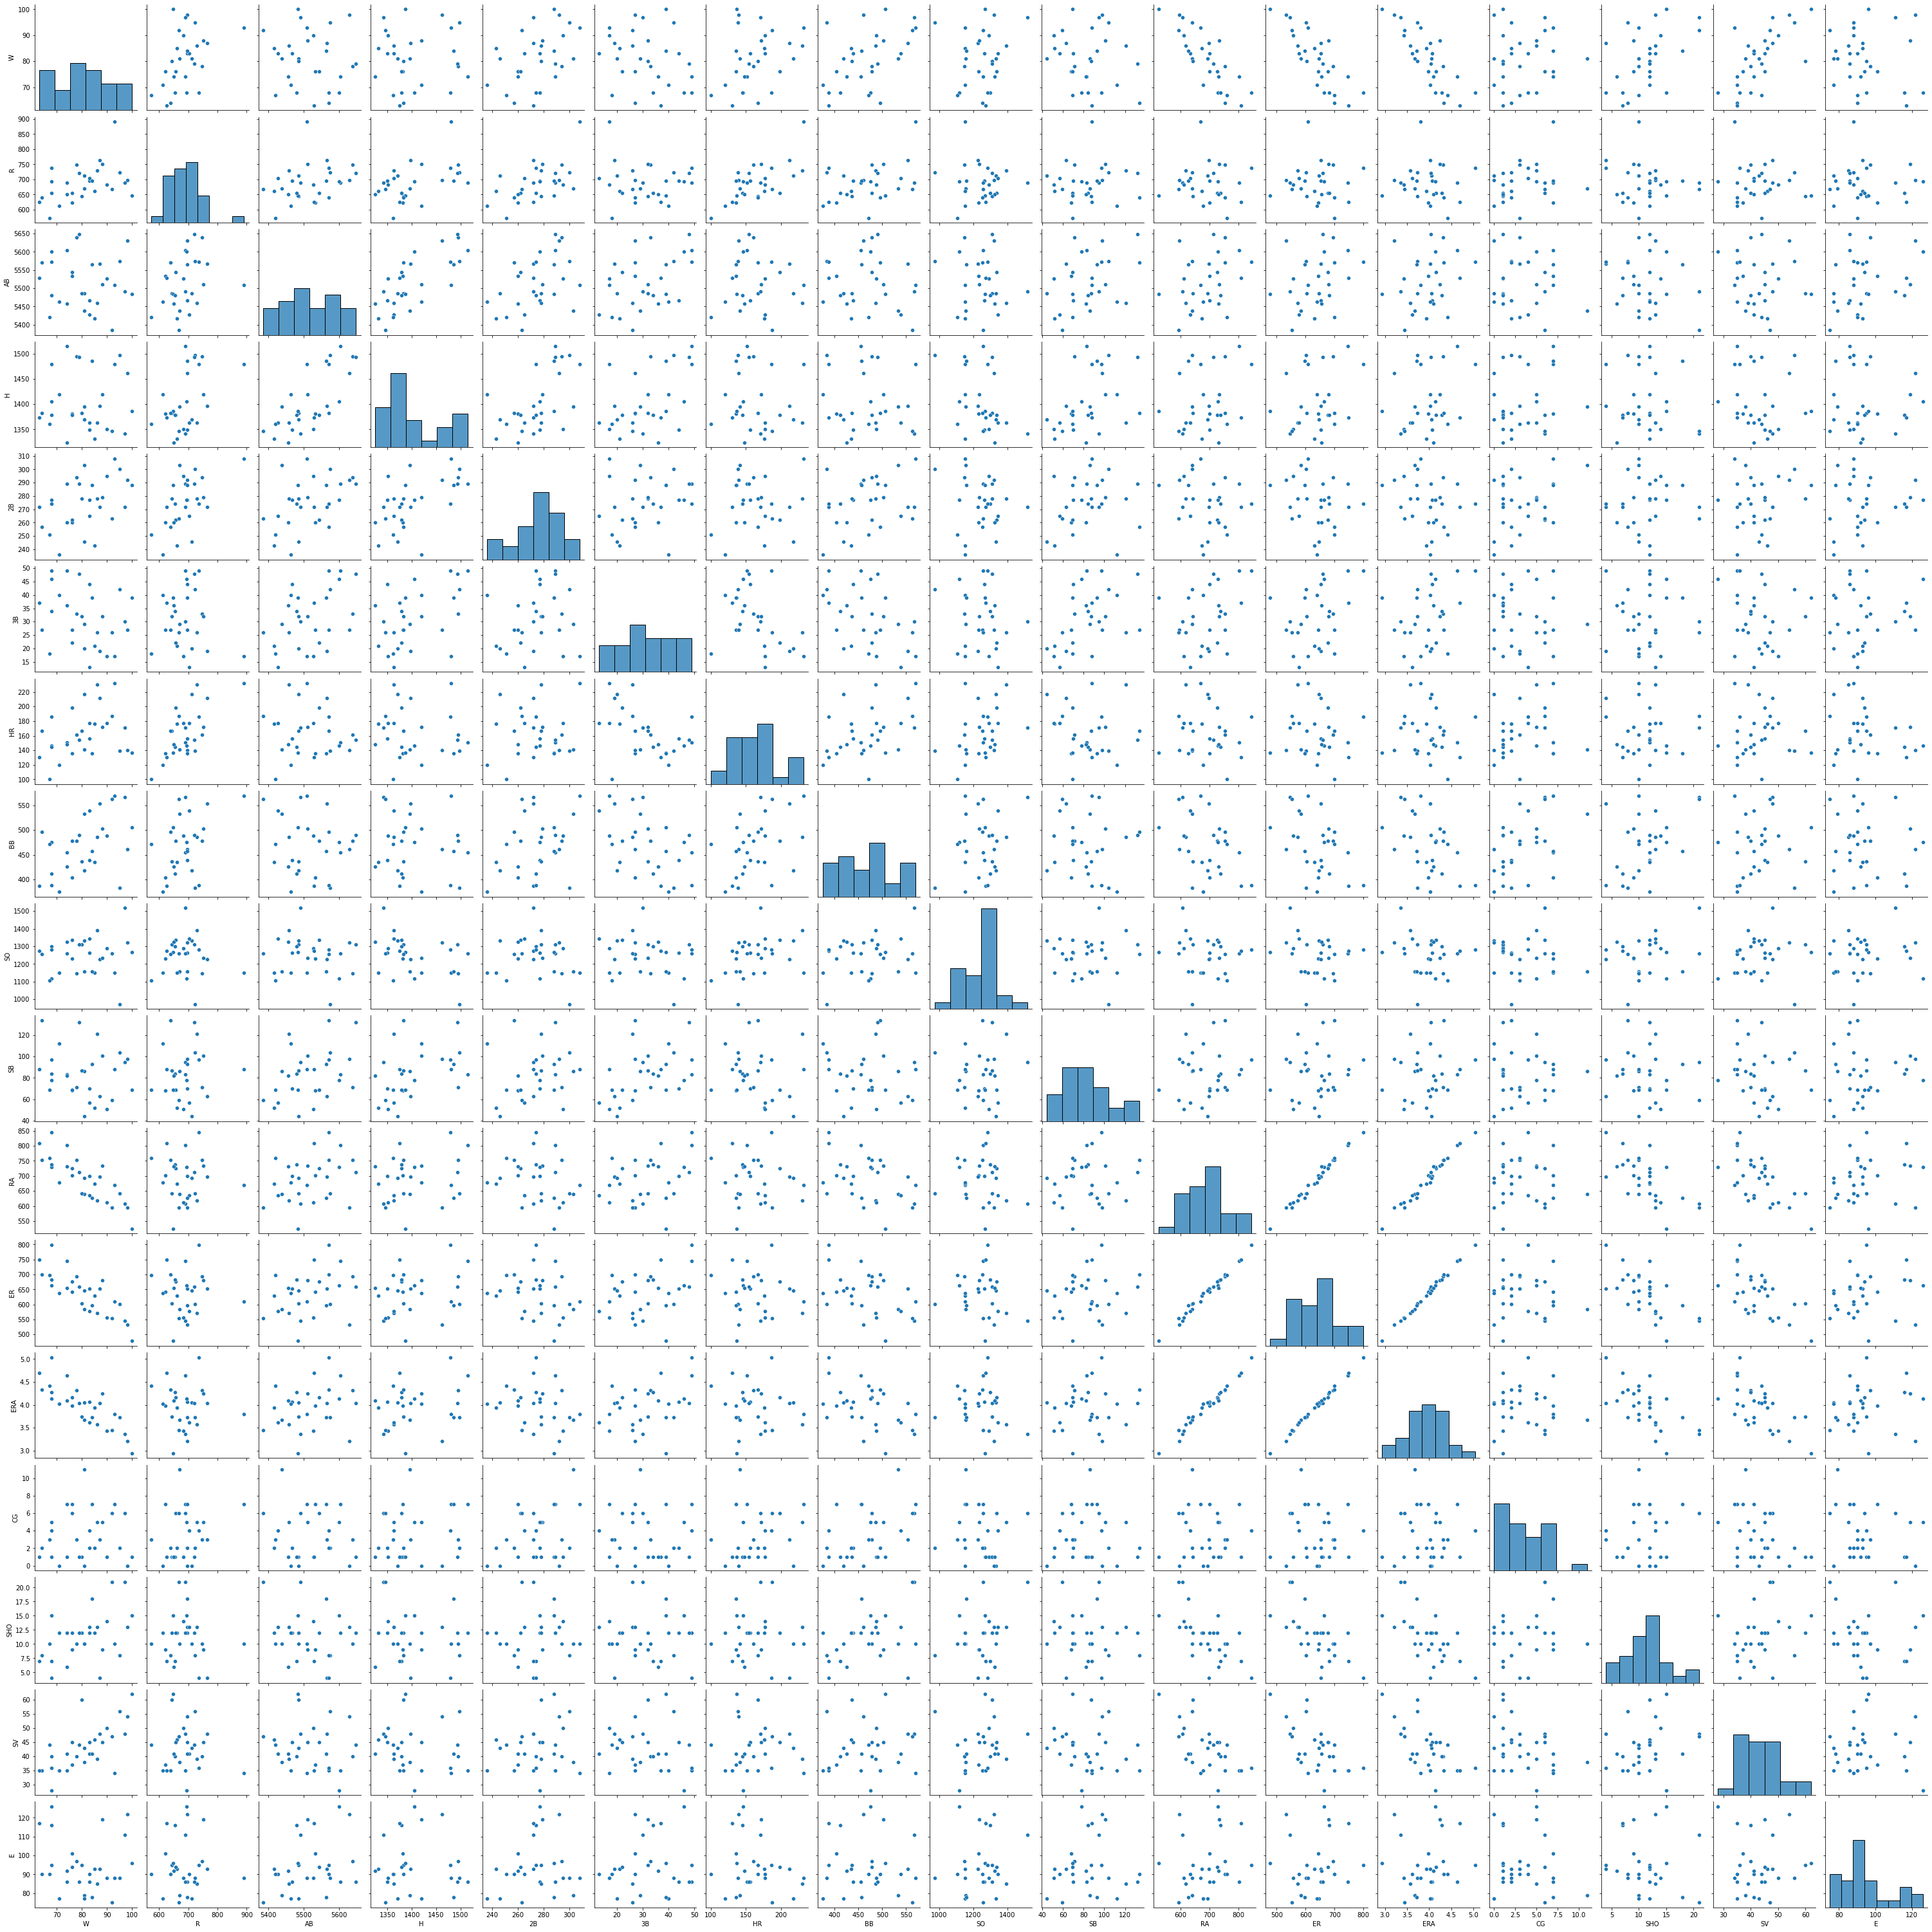

In [29]:
sns.pairplot(df)

In [30]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

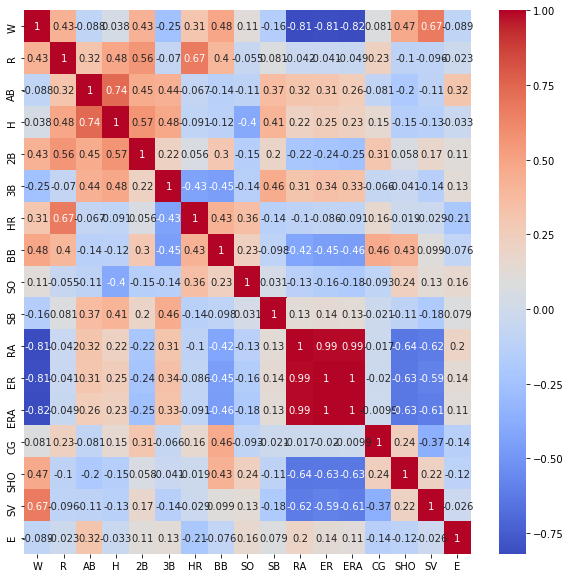

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,annot_kws={'size': 10})

<AxesSubplot:>

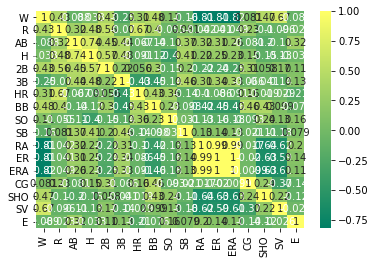

In [32]:
sns.heatmap(df.corr(),cmap='summer',annot=True)

From above heatmap, we can see that output is in good correlation with all the inputs, so will not drop any column.

# Multicollinearity using VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
df.head(4)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


We will takeout the input and output from the dataframe using iloc function.

In [35]:
x=df.iloc[:,1:]
x.head(4)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


In [36]:
x.shape

(30, 16)

In [37]:
y=df.iloc[:,-17]
y.head(4)

0    95
1    83
2    81
3    76
Name: W, dtype: int64

In [38]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [39]:
vif_calc()

   features    VIF Factor
0         R   1638.985029
1        AB   4277.157018
2         H   4698.798408
3        2B    904.439835
4        3B     32.435486
5        HR    285.773237
6        BB    269.485018
7        SO    398.234104
8        SB     28.654970
9        RA  17204.829356
10       ER  49837.289228
11      ERA  23551.544014
12       CG      6.771036
13      SHO     30.276598
14       SV    119.686080
15        E     94.215202


From above calculation, we can see that ER, ERA column has high value. So we will drop ER column as in comparison between two, it is contributing less to the output.
Same as between AB and H, we will drop AB column to remove multicollinearity.

In [40]:
df.drop(['ER','AB'],axis=1,inplace=True)

In [41]:
df.head(5)

,W,R,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86


In [42]:
df.shape

(30, 15)

In [43]:
x=df.iloc[:,1:]
x.head(4)

,R,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,696,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,669,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,622,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101


In [44]:
y=df.iloc[:,-15]
y.head(4)

0    95
1    83
2    81
3    76
Name: W, dtype: int64

In [45]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [46]:
vif_calc()

   features   VIF Factor
0         R  1268.198047
1         H  1911.779452
2        2B   861.943784
3        3B    29.298901
4        HR   194.088753
5        BB   254.333669
6        SO   316.489623
7        SB    26.691860
8        RA  8414.218563
9       ERA  6544.887694
10       CG     6.299581
11      SHO    29.241281
12       SV   100.070905
13        E    85.573407


In [47]:
df.corr()

,W,R,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
W,1.000000,0.430751,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
H,0.037612,0.482856,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.126063,-0.020783,-0.106563,-0.183418,0.079149
RA,-0.812952,-0.041623,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.986674,-0.016659,-0.636862,-0.616224,0.198996


From above VIF, we can see that RA, ERA column has high value. So we will drop RA column as in comparison between two, it is contributing less to the output.

In [48]:
df.drop(['RA'],axis=1,,)

SyntaxError: invalid syntax (<ipython-input-48-e0f9366464cc>, line 1)

In [ ]:
df.shape

# Removing Outliers using Zscore

In [ ]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df_new=df[(z<3).all(axis=1)]

In [ ]:
df_new.head()

In [ ]:
df.shape

In [ ]:
df_new.shape

In [ ]:
loss_percentage=(30-29)/30*100
print(loss_percentage)

In [ ]:
df=df_new

In [ ]:
df.shape

In [ ]:
x=df.iloc[:,1:]
x.head(4)

In [ ]:
y=df.iloc[:,-14]
y.head(4)

# Removing Skewness

In [ ]:
df.skew()

We will use power transform method to remove skewness from the data.

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
x=power_transform(x,method='yeo-johnson')
x

In [ ]:
df['R'].plot.hist()

In [ ]:
df['H'].plot.hist()

In [ ]:
df['SO'].plot.hist()

In [ ]:
df['CG'].plot.hist()

# Scaling of the data

We will use StandardScaler for scaling of data.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=4)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

Here in linear regression score is coming out as 96%, we will use other models further to check the predicted score value.

In [ ]:
pred=lr.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
print(r2_score(y_test,pred))

In linear regression r2 score is 0.82, we will try to see it by using other models.

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

In [ ]:
predls=ls.predict(x_test)
print('Predicted result price:',predls)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predls))
print('Mean squared error:',mean_squared_error(y_test,predls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predls)))

In [ ]:
print(r2_score(y_test,predls))

In lasso r2 score is 0.87, which is better than linear regression which is 0.82

In [ ]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

In [ ]:
predrd=rd.predict(x_test)
print('Predicted result price:',predrd)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrd)))

In [ ]:
print(r2_score(y_test,predrd))

In [ ]:
In ridge r2 score is 0.82, which is lesser than lasso i.e is 0.87

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

In [ ]:
predenr=enr.predict(x_test)
print('Predicted result price:',predenr)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predenr))
print('Mean squared error:',mean_squared_error(y_test,predenr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predenr)))

In [ ]:
print(r2_score(y_test,predenr))

In [ ]:
In elasticnet r2 score is 0.82, which is lesser than lasso i.e is 0.87. 
Here best r2 score is of Lasso model, we will try to improve it by by finding best alpha value using GridsearchCV.

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(lr,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

In [ ]:
score=cross_val_score(ls,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

In [ ]:
score=cross_val_score(rd,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

# Hypermeter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
modelrd=Ridge()
modells=Lasso()

In [ ]:
grid= GridSearchCV(estimator=modelrd,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

By using gridsearchCV, alpha value 1 is the best value for Ridge. So, we will predict the result using it 

In [ ]:
grid1= GridSearchCV(estimator=modells,param_grid=alphavalue)
grid1.fit(x,y)
print(grid1)
print(grid1.best_score_)
print(grid1.best_estimator_.alpha)
print(grid1.best_params_)

By using gridsearchCV, alpha value 1 is the best value for Lasso. So, we will predict the result using it 

In [ ]:
ls1=Lasso(alpha=1)
ls1.fit(x_train,y_train)
ls1.score(x_train,y_train)

In [ ]:
predls1=ls1.predict(x_test)
print('Predicted result price:',predls1)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predls1))
print('Mean squared error:',mean_squared_error(y_test,predls1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predls1)))

In [ ]:
print(r2_score(y_test,predls1))

r2 score of Lasso remains the same after using alpha=1 also, so we will use any of the lasso model.

In [ ]:
rd1=Ridge(alpha=1)
rd1.fit(x_train,y_train)
rd1.score(x_train,y_train)

In [ ]:
predrd1=rd1.predict(x_test)
print('Predicted result price:',predrd1)
print('actual price',y_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd1))
print('Mean squared error:',mean_squared_error(y_test,predrd1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrd1)))

In [ ]:
print(r2_score(y_test,predrd1))

r2 score of ridge remains the same after using alpha=1 also.

As from the above models, we can see that r2 score of lasso model is best. i.e 87. So, we will use this model for prediction and save it.

In [ ]:
import pickle
filename='baseball.pkl'
pickle.dump(ls, open(filename,'wb'))